# Домашнее задание по теме "Корреляция и корреляционный анализ"

### Задание

- Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness
 Дополнительно будет выложен в ЛК
- В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
- a. Построить точечный график
- b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
- c. Построить модель линейной регрессии
- d. Рассчитать коэффициент детерминации
- e. Вывести график остатков
2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
- a. Разделить данные на 2 группы
- b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# смертность на 100 000 и кальций в воде 61 города Англий и Уэльс
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


# Задача 1. Есть ли связь между жёсткостью воды и средней годовой смертностью?
### a. Построить точечный график

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

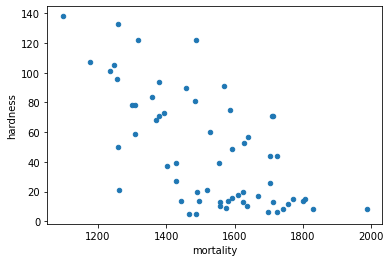

In [11]:
# точечный график между смерностью и жёсткостью воды
df.plot(kind='scatter', x='mortality', y='hardness')

### b. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [8]:
# коэффициент Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [12]:
# коэффициент Спирмена
df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### c. Построить модель линейной регрессии

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
x = df[['mortality']]
y = df['hardness']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
x_train.shape

(42, 1)

In [21]:
y_train.shape

(42,)

In [23]:
# создадим класс, далее .fit метод обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
model.coef_

array([-0.12670202])

In [26]:
model.intercept_

239.3678426140957

In [43]:
y_pred = model.predict(x_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

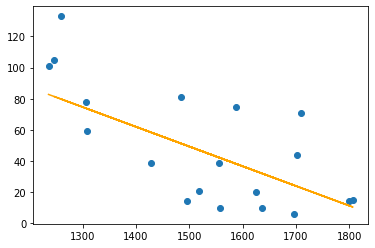

In [134]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='orange')

### d. Рассчитать коэффициент детерминации

In [49]:
# .score метод возвращает значение коэф-та детерминации 0.49 - средний коэф-т: модель не слишком хорошо объясняет завис-ть данных
model.score(x_test, y_test) 

0.4948982822876836

### e. Вывести график остатков

In [60]:
residuals = y_test-y_pred

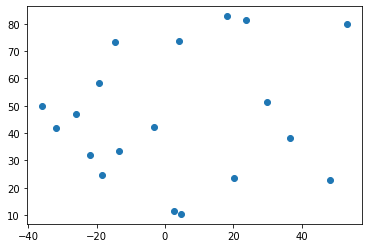

In [132]:
# график получился более менее равномерный, поэтому всё вроде бы неплохо
plt.scatter(residuals, y_pred)

### Есть ли связь между жёсткостью воды и средней годовой смертностью? 
Отвечая на вопрос, есть какая-то связь, что при уменьшении жёсткости воды среднегодовая смертность растёт, наверное, химикам виднее будет какая вода полезнее для человека, но пока так))

# Задача 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
#### a. Разделить данные на 2 группы
#### b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [74]:
dg_south = df[df['location'] == 'South']
dg_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [77]:
dg_north = df[df['location'] == 'North']
dg_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:title={'center':'North'}, xlabel='mortality', ylabel='hardness'>

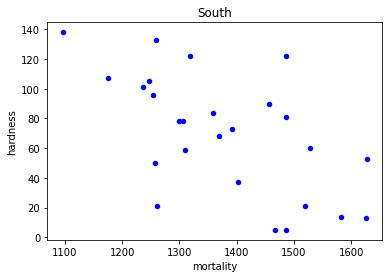

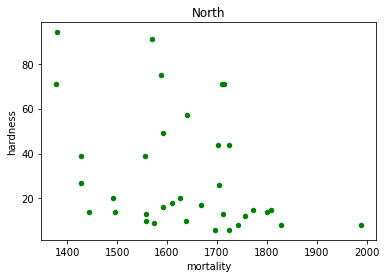

In [85]:
dg_south.plot(kind='scatter', x='mortality', y='hardness', title = 'South', c='b')
dg_north.plot(kind='scatter', x='mortality', y='hardness', title = 'North', c='g')

In [94]:
dg_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [95]:
dg_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [96]:
dg_south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [98]:
dg_north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [100]:
x1 = dg_south[['mortality']]
y1 = dg_south['hardness']
x2 = dg_north[['mortality']]
y2 = dg_north['hardness']

In [102]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=42)

In [104]:
model1 = LinearRegression()
model1.fit(x1_train, y1_train)
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression()

In [108]:
print(model1.coef_, ' ', model1.intercept_)
print(model2.coef_, ' ', model2.intercept_)

[-0.18112812]   324.11907462359864
[-0.09774218]   191.72797679112006


In [113]:
y1_pred = model1.predict(x1_test)
y1_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [114]:
y2_pred = model2.predict(x2_test)
y2_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

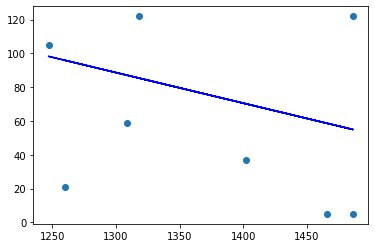

In [124]:
# South
plt.scatter(x1_test, y1_test)
plt.plot(x1_test, y1_pred, c='b')

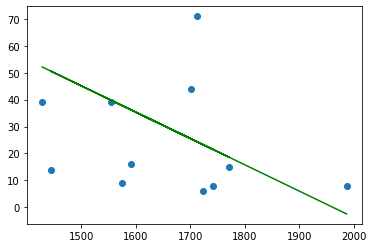

In [125]:
# North
plt.scatter(x2_test, y2_test)
plt.plot(x2_test, y2_pred, c='g')

In [127]:
model1.score(x1_test, y1_test) 

-0.05226615794483824

In [129]:
model2.score(x2_test, y2_test) 

-0.34863672627416675

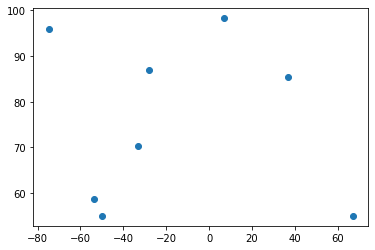

In [130]:
residuals1 =  y1_test-y1_pred
plt.scatter(residuals1, y1_pred)

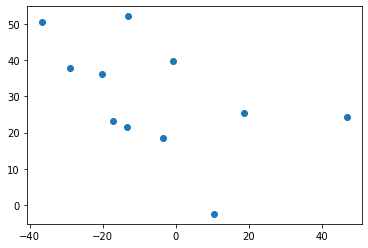

In [135]:
residuals2 =  y2_test-y2_pred
plt.scatter(residuals2, y2_pred)

### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? 
Здесь аналогично первой задаче, однако на севере зависимость лучше проявляет себе, чем на юге, коэффициенты детерминации соответственно у севера лучше, на юге